In [10]:
import pandas as pd
import matplotlib.pylab as plt

In [11]:
dataset = pd.read_csv("clean_df.csv")
dataset.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,std,turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
plt.figure(figsize=(30, 50))
sns.heatmap(dataset.corr(), annot=True, vmin=-1, cmap='RdBu').set_title('Correlation Heatmap')

NameError: name 'plt' is not defined

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

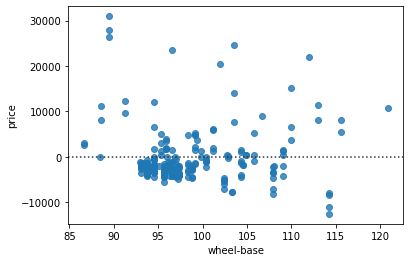

In [14]:
sns.residplot(x='wheel-base', y='price', data=dataset)

In [15]:
quadratic=['highway-mpg', 'city-mpg', 'length']
linear = ['horsepower', 'engine-size', 'curb-weight', 'width', 'length']
both = ['highway-mpg', 'city-mpg', 'length', 'horsepower', 'engine-size', 'curb-weight', 'width', 'length']

c:\users\wawdh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

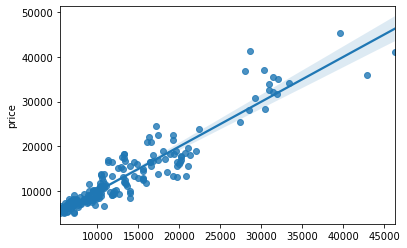

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pr = PolynomialFeatures(degree=2, include_bias=False)
sc = StandardScaler()
lr = LinearRegression()

y = dataset['price']

X_transformed = sc.fit_transform(dataset[linear])
X_transformed = pr.fit_transform(X_transformed)

lr.fit(X_transformed, y)
y_test = lr.predict(X_transformed)

sns.regplot(y_test, y)

c:\users\wawdh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\wawdh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

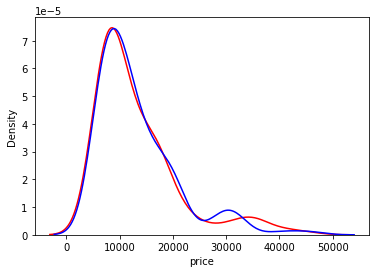

In [17]:
ax1 = sns.distplot(y, hist=False, color='r', label="Actual value")
sns.distplot(y_test, color='b', hist=False, label="Fitted Values", ax=ax1)

c:\users\wawdh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\wawdh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

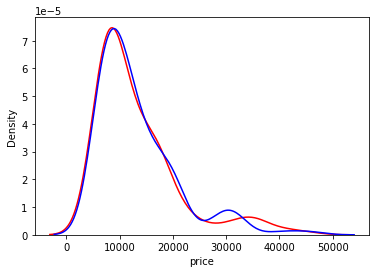

In [18]:
ax1 = sns.distplot(y, hist=False, color='r', label="Actual value")
sns.distplot(y_test, color='b', hist=False, label="Fitted Values", ax=ax1)